In [ ]:
from typing import Dict
import pandas as pd
import numpy as np
import random
from random import choices
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.stats import poisson
from scipy.stats import gengamma
from collections import Counter
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx #for the powerlaw network
import csv

def build_networks(uniform, poisson, powerlaw):
    N: int = 1700 #number of users in the network
    mean_degree: int = 15
    
    if uniform == True:
        node_degrees: np.array = np.empty(N)
        node_degrees.fill(mean_degree)  
        node_degrees = node_degrees.astype(int)
        
    if poisson == True:
        node_degrees: np.array = np.random.poisson(lam=mean_degree, size=N) 
        node_degrees = node_degrees.astype(int)
    
    if powerlaw == True:
        G= nx.barabasi_albert_graph(N,1)
        degrees = dict(G.degree())
        node_degrees: np.array = np.empty(N)
        for i in range(N):
            node_degrees[i]=degrees[i]
        node_degrees = node_degrees.astype(int)
    
    node_ids: np.array = np.arange(N)
    adjacency_list = []
    
    for i in range(len(node_degrees)):
        adjacency_list1: Dict[int, np.array] = dict()
        adjacency_list.append(adjacency_list1)    
    
    for i in range(len(node_degrees)):
        adjacency_list[0][i] = np.random.choice(node_ids, node_degrees[i]) #random sample from node_ids with size=node_degrees1[meme_id]
    
    nets=[]
    nets.append(node_ids)
    nets.append(node_degrees)
    nets.append(adjacency_list)
    return nets

def simulate_networks(nets, form1, form2, scale1, scale2):
    node_ids=nets[0]
    node_degrees=nets[1]
    adjacency_list=nets[2]
    
    tick = 0
    tick_max: int = 70
    max_time: int = 800
    M: int = 5392367 #5392367 - size of german dataset
    meme_ids: np.array = np.arange(M)
    meme_sizes: np.array = np.zeros(M)
    meme_sizes = meme_sizes.astype(int)
    times: np.array = np.full(M, max_time)
    
    for meme_id in tqdm(meme_ids):
        
        time: int = times[meme_id]
        
        infected: np.array = np.random.choice(node_ids,1)
        exposed = []
        
        tran_prob: float = gengamma.rvs(2*form1, form1, 0.01, scale1, size=1)[0]
        decrease_rate: float = gengamma.rvs(2*form2, form2, 0.01, scale2, size=1)[0]
        
        g = open("sim_memes_v13_1.txt", "a")#221
        
        for t in range(time):
            
            transmission_probability: float = tran_prob * math.exp(-decrease_rate*t)
            
            for i in range(len(infected)):
                exposed=nets[2][0][infected[i]]
                number_infected: int = np.random.poisson(lam=1*transmission_probability * len(exposed), size=1)[0]
                
                if number_infected > 0:  
                    choice_number = min(number_infected, len(exposed))
                    choice = np.random.choice(exposed, choice_number, replace=False)
                    
                    for k in range(len(choice)):
                        if (choice[k] in infected)  == False:
                            infected = np.append(infected, choice[k])
                            tick = 0
                
                if tick>tick_max:
                    break
                
                tick = tick+1
            
        meme_sizes[meme_id]= len(infected)
        
        L = [str(meme_id), " ", str(len(infected)), " ", str(tran_prob), " ", str(decrease_rate), "\n"]
        g.writelines(L)
        g.close()
        
        infected = []
        exposed = []
        
    return meme_sizes
        
nets = build_networks( False,  False, True) #1st - Uniform, 2nd Poisson, 3rd Powerlaw
memes = simulate_networks(nets, 0.6, 4.6, 0.164, 0.65)

  1%|          | 35489/5392367 [04:09<8:36:50, 172.74it/s] 

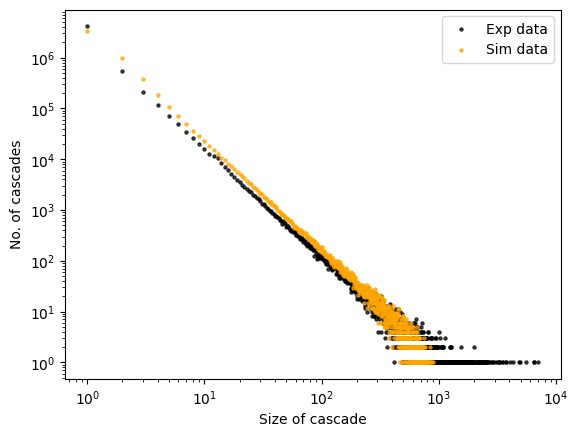

In [1]:
import pandas as pd
import numpy as np
import random
from random import choices
import pdb
import matplotlib.pyplot as plt
from scipy.stats import gengamma
from collections import Counter
import math
import matplotlib.pyplot as plt

#SIMULATION DATA
#data1 = pd.read_csv(f'sim_v12_{x}_{y}_{w}_{z}.txt', sep=" ", header=None)
data1 = pd.read_csv(f'sim_memes_v13_203.txt', sep=" ", header=None)
data1.columns = ["iter", "size", "a_i", "d"]
counter1 = Counter(data1['size'])
sizes1 = np.array(list(counter1.keys()))
counts1 = np.array(list(counter1.values()))
max_val = max(counts1)
counts_norm1 = counts1/max_val

#EXPERIMENTAL DATA
data_counts = pd.read_pickle('Covid_counts_de.pkl')
data_counts['Count'].to_pickle('Covid_counts_de2.pkl')
size_distribution = data_counts.groupby('Count')['Count'].count()
x = np.array(size_distribution.index)
y = np.array(size_distribution)
plt.scatter(x, y, color="black", alpha = 0.7, s=5, label = 'Exp data')
plt.scatter(sizes1,counts1, color="orange",alpha = 0.7, s=5, label = 'Sim data')

#AESTHETIC CHANGES
plt.legend(scatterpoints=1, loc='upper right')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Size of cascade")
plt.ylabel("No. of cascades")
#plt.savefig("sim_v6_3.png")
plt.show()